<a href="https://colab.research.google.com/github/naica922/uek_259_MachieneLearning/blob/main/demos/04_Clustering_with_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-10.14090825  -2.92036477]
 [-10.84916816  -2.95246712]
 [ -7.8710604   -8.10416641]
 [  0.53113982   2.51012895]
 [ -5.99589621  -8.36298104]
 [  0.2450988    5.51754657]
 [ -9.37972697  -4.13752487]
 [ -7.20423399  -8.88176559]
 [ -9.68744022  -6.04759636]
 [ -6.63896201  -8.10414771]]
[1 1 2 0 2 0 1 2 1 2]


True

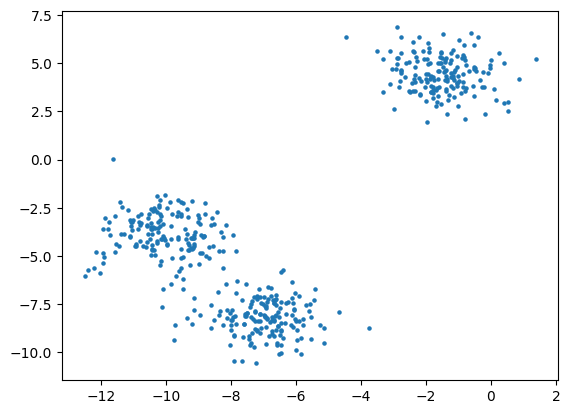

In [13]:
import seaborn as sns #for plotting
from sklearn.datasets import make_blobs #data generator
import numpy as np

# automatically generate a random dataset with underlying clusters. You can play around with the parameters of this generator function to test your algorithm.
# true labels are the actual group a point belongs to. you can use them later to check the quality of your algorithm

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
# automatically generate random dataset

features, true_labels = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=1,
    random_state=1
)

print(features[:10])
print( true_labels[:10])
fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], s=5)
           #,c=true_labels)
plt.plot()
# visualize the data with the true labels to get an overview of the data


In [15]:
# implement the kmeans algorithm

# and return a 1D array of estimated group membership of each point, and the coordinates of the cluster centers.
def k_means(featureArray, nGroups):

# Array of 2D points called clusterCenters
    clusterCenters = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
    if nGroups  == 3:
      clusterCenters
      print(clusterCenters)
    else:
      print("The init failed")

# ClusterAssignments List smae length as featureArray
# Track the membership
    clusterAssignments = np.empty(featureArray.shape[0])
    print('Cluster Assignments')
    print(clusterAssignments)


# Todo: implement the rest of the k-means algorithm
    return clusterAssignments, clusterCenters

In [ ]:
# apply k means to your dataset to cluster the data

estimated_labels, cluster_centers = k_means(features, 4)

In [ ]:
# visualize your results

# Return 1D array of estimated group membership of each point
print('Estimated group membership of each oint')

# coordinates of the cluster center
print('Cluster center coordinates')